In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [2]:
df = pd.read_csv('anies_label.csv')
df = pd.DataFrame(df[[ 'detokens', 'label']])
df

,detokens,label
0,alhamdulilah bacapres litbang kompas rilis has...,negatif
1,syamsuddin senang cawapres ketimbang khofifah,positif
2,selamat indonesia silah pilih tuju,positif
3,bukti rawan gagal polisi bangun jalan jokowi,negatif
4,sambut hangat masyarakat ponorogo jawa timur d...,positif
...,...,...
2560,pimpin kelas dunia nyata posisi indonesia maje...,negatif
2561,terimakasih masyarakat brebes jawa semangat du...,positif
2562,tegas lanjut program jokowi menang pilpres,positif
2563,tani brebes jateng deklarasi dukung capres,positif


In [3]:
df_negative = df[ (df['label']=='negatif')]
df_positive = df[ (df['label']=='positif')]
#covert to list
negative_list = df_negative['detokens'].tolist()
positive_list = df_positive['detokens'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

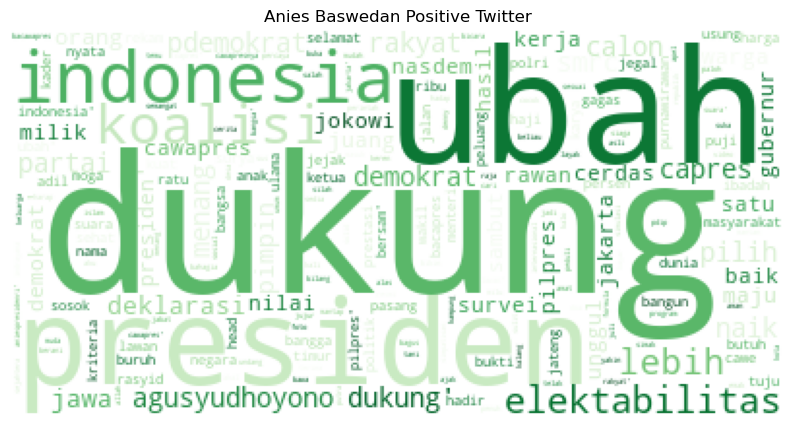

In [4]:
wordcloud = WordCloud(background_color="White",colormap='Greens' , max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_positive)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Anies Baswedan Positive Twitter")
plt.show()

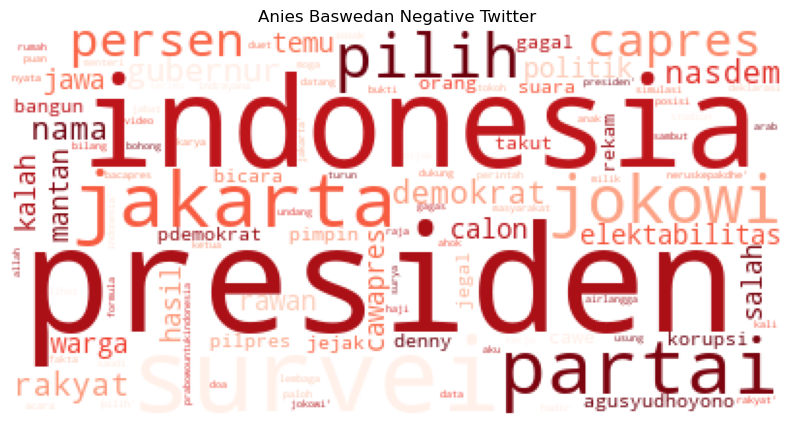

In [5]:
wordcloud = WordCloud(background_color="White", colormap='Reds' ,max_words=200, contour_color="steelblue", contour_width=8, collocations=False).generate(filtered_negative)
plt.figure(1, figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0,y=0)
plt.title("Anies Baswedan Negative Twitter")
plt.show()

# topik

In [6]:
df = pd.read_csv('anies_prepro.csv', dtype=str)
df = pd.DataFrame(df[['stemming']])
df

,stemming
0,"['alhamdulilah', 'bacapres', 'litbang', 'kompa..."
1,"['syamsuddin', 'senang', 'cawapres', 'ketimban..."
2,"['selamat', 'indonesia', 'silah', 'pilih', 'tu..."
3,"['bukti', 'rawan', 'gagal', 'polisi', 'bangun'..."
4,"['sambut', 'hangat', 'masyarakat', 'ponorogo',..."
...,...
2560,"['pimpin', 'kelas', 'dunia', 'nyata', 'posisi'..."
2561,"['terimakasih', 'masyarakat', 'brebes', 'jawa'..."
2562,"['tegas', 'lanjut', 'program', 'jokowi', 'mena..."
2563,"['tani', 'brebes', 'jateng', 'deklarasi', 'duk..."


In [7]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
data = vectorizer.fit_transform(df['stemming'])
feature_names = vectorizer.get_feature_names_out()

In [8]:
n_topics = 10
n_top_words = 10

nmf = NMF(n_components=n_topics).fit(data)
W = nmf.components_
H = nmf.transform(data)

In [9]:
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topik {topic_idx} : {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]])}")

Topik 0 : lebih elektabilitas naik smrc agusyudhoyono pdemokrat demokrat bersam pasang milik
Topik 1 : indonesia rakyat baik aniespendukungkhilafah kelam aniesnasdemout butuh pimpin ubah bangsa
Topik 2 : dukung deklarasi jawa pilpres purnawirawan polri rawan partai warga ratus
Topik 3 : persen gubernur mantan jakarta jawa neruskepakdhe ketua prabowountukindonesia simulasi semuadukungprabowo
Topik 4 : presiden calon rasyid alumni wakil jokowi menang deklarasi satu prediksi
Topik 5 : ubah koalisi satu cawapres partai usung nasdem bacapres capres umum
Topik 6 : demokrat pdemokrat agusyudhoyono menang kriteria peluang bacawapres aku bicara partai
Topik 7 : pilih dajjal orang selamat cerdas cawapres agama responden warga ogah
Topik 8 : survei capres kalah hasil unggul airlangga duet puan suara simulasi
Topik 9 : jejak rekam jakarta jokowi pimpin orang guys aniespresiden bangun bukti
